**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import accuracy_score


**LOADING THE DATASET**

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

DATA DESCRIPTION:

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.dtypes

,0
area_type,object
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64


**CHECK FOR MISSING/NULL VALUES:**

In [8]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [9]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

DROPPING UNWANTED COLUMNS

In [10]:
df = df.drop(['area_type','availability','location','society'],axis='columns')

In [11]:
df.head()

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00


In [12]:
df.isnull().sum()

,0
size,16
total_sqft,0
bath,73
balcony,609
price,0


MAPPING CATEGORICAL VALUES TO NUMERICAL VALUES - **ENCODING**

In [13]:
# Mapping the 'size' column to numeric values
size_mapping = {
    "2 BHK": 2,
    "3 BHK": 3,
    "4 Bedroom": 4,
    "1 BHK": 1
}

# Apply the mapping
df['size'] = df['size'].map(size_mapping)

# If there are any missing values, fill them with the most frequent size
df['size'] = df['size'].fillna(df['size'].mode()[0])


In [14]:
df['size'].isnull().sum()

0

In [15]:
df.head()

,size,total_sqft,bath,balcony,price
0,2.0,1056,2.0,1.0,39.07
1,4.0,2600,5.0,3.0,120.00
2,3.0,1440,2.0,3.0,62.00
3,3.0,1521,3.0,1.0,95.00
4,2.0,1200,2.0,1.0,51.00


**IMPUTING MISSING VALUES WITH CENTRAL TENDENCY VALUES**

In [16]:
df['bath'] = df['bath'].fillna(df['bath'].mean())

In [17]:
df['bath'].isnull().sum()

0

In [18]:
df['balcony'] = df['balcony'].fillna(df['balcony'].mean())

In [19]:
df['balcony'].isnull().sum()

0

**FINALLY CHECKING IF THERE AREN'T ANY NULL VALUES IN OUR DS**

In [20]:
df.isnull().sum()

,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


**VISUALIZING DATA**

<Axes: xlabel='price', ylabel='count'>

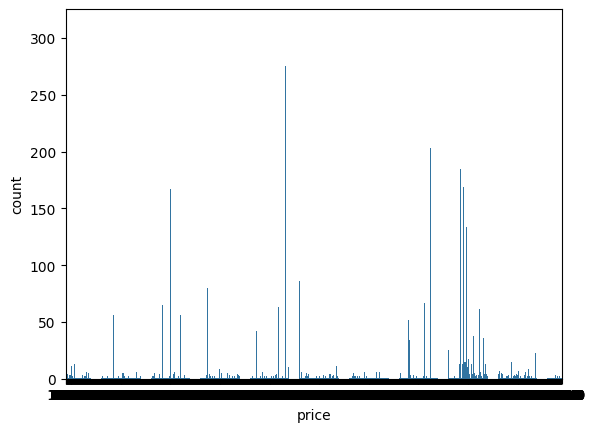

In [21]:
sns.countplot(x='price',data=df)

<Axes: xlabel='price', ylabel='count'>

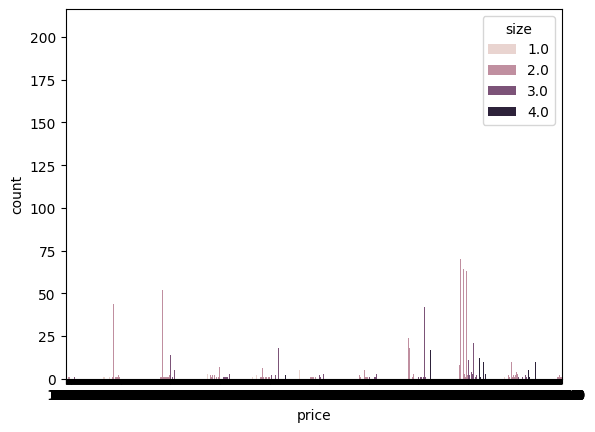

In [22]:
sns.countplot(x='price',hue='size',data=df)

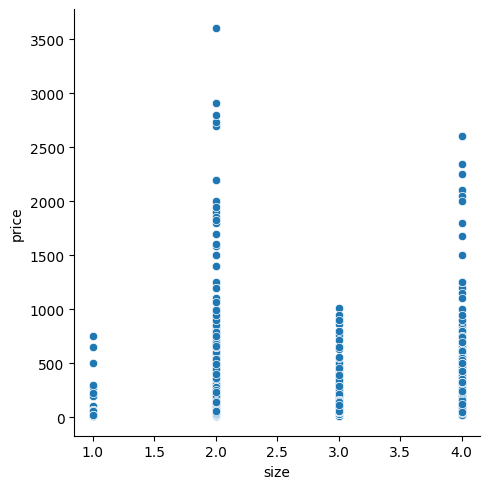

In [23]:
sns.relplot(x='size',y='price',data=df)

<Axes: xlabel='price', ylabel='balcony'>

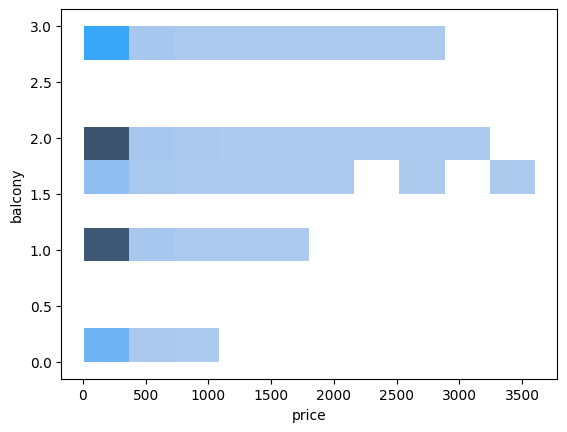

In [24]:
sns.histplot(y='balcony',x='price',data=df,bins=10)

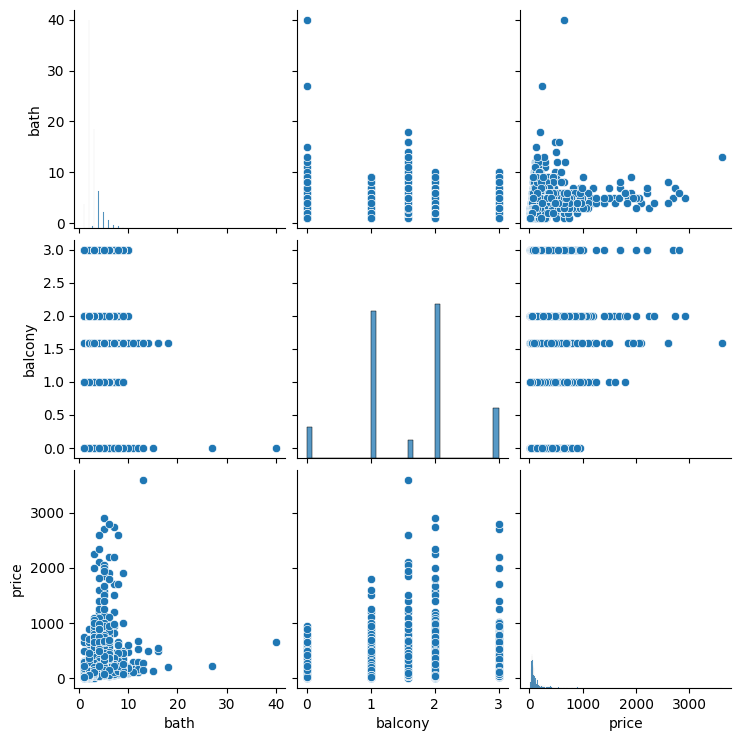

In [25]:
# Plotting pairwise relationships between multiple features
sns.pairplot(df[['total_sqft', 'bath', 'balcony', 'price']])
plt.show()

**FEATURE ENGINEERING**

In [26]:
df.dtypes

,0
size,float64
total_sqft,object
bath,float64
balcony,float64
price,float64


*CATEGORICAL TO NUMERICAL CONVERSION - ENCODING*

In [27]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].mean())

In [28]:
df.dtypes

,0
size,float64
total_sqft,float64
bath,float64
balcony,float64
price,float64


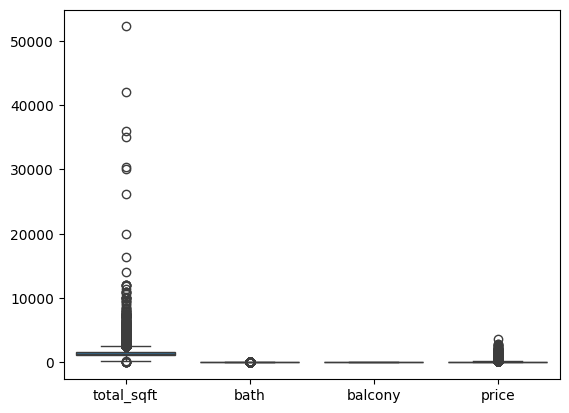

In [29]:
# Visualize outliers using boxplots
sns.boxplot(data=df[['total_sqft', 'bath', 'balcony', 'price']])
plt.show()


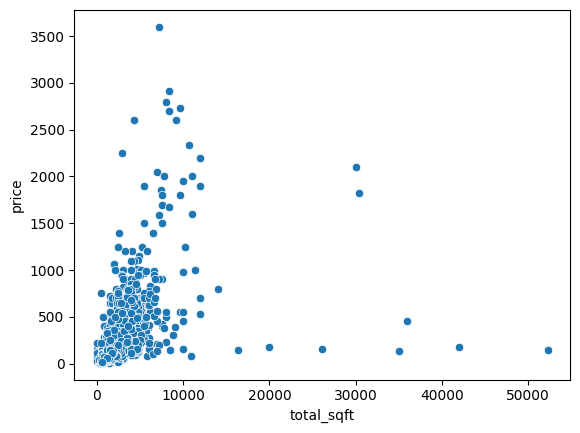

In [30]:
# Scatter plot between 'total_sqft' and 'price' to visualize their relationship
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.show()


In [31]:
X=df.drop('price',axis=1)
Y=df['price']

In [32]:
X

,size,total_sqft,bath,balcony
0,2.0,1056.0,2.0,1.000000
1,4.0,2600.0,5.0,3.000000
2,3.0,1440.0,2.0,3.000000
3,3.0,1521.0,3.0,1.000000
4,2.0,1200.0,2.0,1.000000
...,...,...,...,...
13315,2.0,3453.0,4.0,0.000000
13316,2.0,3600.0,5.0,1.584376
13317,2.0,1141.0,2.0,1.000000
13318,2.0,4689.0,4.0,1.000000


In [33]:
Y

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00
...,...
13315,231.00
13316,400.00
13317,60.00
13318,488.00


In [34]:
# Check the data types of the columns
print("Data Types:")
print(df.dtypes)

# Check the unique values in each column to identify potential categorical columns
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")



Data Types:
size          float64
total_sqft    float64
bath          float64
balcony       float64
price         float64
dtype: object

Unique Values in Each Column:
size: [2. 4. 3. 1.]
total_sqft: [1056. 2600. 1440. ... 2758.  774. 4689.]
bath: [ 2.          5.          3.          4.          6.          1.
  9.          2.69260965  8.          7.         11.         10.
 14.         27.         12.         16.         40.         15.
 13.         18.        ]
balcony: [1.         3.         1.58437574 2.         0.        ]
price: [ 39.07 120.    62.   ...  40.14 231.   488.  ]


**SPLITTING INTO TRAINING DATA & TESTING DATA**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train,Y_train)

LinearRegression()

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
pred = model.predict(X_test)

In [40]:
# Evaluate the model's performance
mae = mean_absolute_error(Y_test, pred)  # Mean Absolute Error
mse = mean_squared_error(Y_test, pred)   # Mean Squared Error
r2 = r2_score(Y_test, pred)              # R-squared


In [41]:
# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 45.0295175770358
Mean Squared Error (MSE): 10732.653035448735
R-squared (R²): 0.4958956424437816


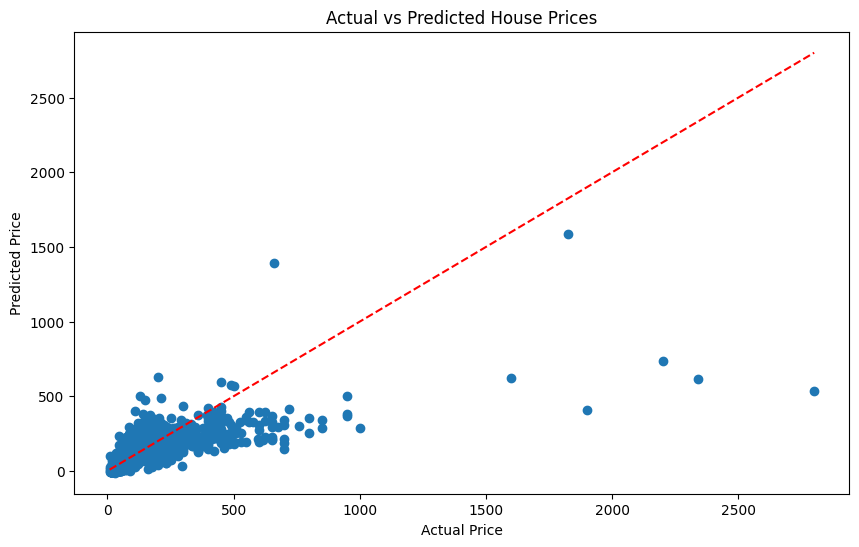

In [42]:
# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()